# Image Dicing || EPOCH Laboratory

In [1]:
%pylab inline

import os
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


### Load and review image

In [2]:
file = '/mnt/vanguard/datasets/titanic-newspaper.jpg'

In [3]:
def load(file):
    return Image.open(file)

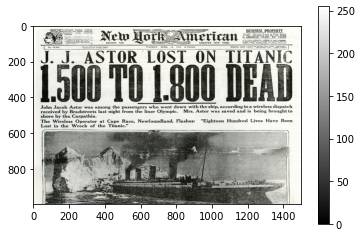

In [4]:
img = load(file)
plt.imshow(img, cmap='gray')
plt.colorbar()

In [5]:
width = img.size[0]
height = img.size[1]
print(img.size)

(1500, 1000)


### Dice Image

In [6]:
window = w, h = (64, 64)
n_width = width // w
n_height = height // h
print('Rows:', n_height + 1)
print('Columns:', n_width + 1)

Rows: 16
Columns: 24


In [7]:
OUTDIR = './render/'
cache = os.path.join(OUTDIR + "titanic_diced_v001.{:04}.png")

In [8]:
def dice(img, width, height, w, h):
    tile = 0
    for y in range(0, height, h):
        for x in range(0, width, w):
            crop = img.crop((x, y, x + w, y + h))
            crop.save(cache.format(tile))
            tile += 1

In [9]:
dice(img, width, height, w, h)

### Reconstruct Image

In [10]:
tile_list = [f for f in sorted(os.listdir(OUTDIR)) if f.endswith('.png')]

In [11]:
canvas = Image.new('RGB', img.size)

for tid, tile in enumerate(tile_list):
    patch = load(OUTDIR + tile)
    row = tid // (n_width + 1)
    col = tid % (n_width + 1)
    canvas.paste(patch, (col * w, row * w))

canvas.save('titanic_recon.png')

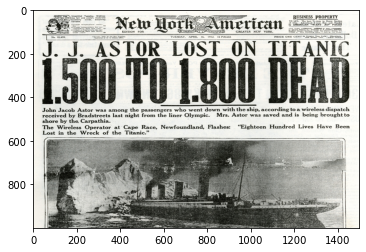

In [12]:
plt.imshow(canvas, cmap='gray')